# This file to prepare the machine learning

In [43]:
import midiprocessor as midip
import guessnote as guessnote
from importlib import reload 
reload(midip)
reload(guessnote)


def buildLearningDataset(radicalFileName):
    Y=midip.buildY('midicontent/'+radicalFileName+'.mid')
    X=guessnote.prepareInputX('wavcontent/'+radicalFileName+'.wav',tolerance=1/40,attenuationfloordb=-5)
    X=X-X.min()
    X=X/X.max()
    
    ymaxindex=np.max(np.where(Y.sum(axis=0)>0))
    xmaxindex=np.max(np.where(X.sum(axis=0)>0))
    
    if ymaxindex>xmaxindex:   
        print(X.shape,Y.shape,xmaxindex)
        Y=Y[:,:xmaxindex]
        X=X[:,:xmaxindex]
        print(X.shape,Y.shape,xmaxindex)
    else:
        Y=Y[:,:ymaxindex]
        X=X[:,:ymaxindex]
    
    np.save("learningdataset/"+radicalFileName+"Y.npy",Y)
    np.save("learningdataset/"+radicalFileName+"X.npy",X)

buildLearningDataset("let-it-be")

Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
Spectro 0.6813223361968994
Spectro 0.6846439838409424
Spectro 0.6226608753204346
Spectro 0.579777717590332
Spectro 0.22568917274475098
Fin danalyse SFFTT 3.158982276916504
Fin Map to note 3.697113275527954
(170, 2501) (102, 3000) 2485
(170, 2485) (102, 2485) 2485


In [44]:
buildLearningDataset("hey-jude")

Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
Spectro 0.7463822364807129
Spectro 0.7268097400665283
Spectro 0.67897629737854
Spectro 0.6244966983795166
Spectro 0.2779717445373535
Fin danalyse SFFTT 3.683565616607666
Fin Map to note 4.129568576812744


In [48]:
import midiprocessor as midip
import guessnote as guessnote
from importlib import reload 
reload(midip)
reload(guessnote)
buildLearningDataset("come-together")

Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
Track 1: Rock Organ
Track 2: Overdriven Guitar
Track 3: Overdriven Guitar
Track 4: Overdriven Guitar
Track 5: Overdriven Guitar
Track 6: Electric Bass
Track 7: Bass Drum
Track 8: Snare Drum
Track 9: Tom Drum
Track 10: Open Hi-Hat
Track 11: Crash Cymbal
Track 12: Come Together
Track 13: by The Beatles
Track 14: Arranged by
Track 15: David R.
Spectro 0.5154616832733154
Spectro 0.5135962963104248
Spectro 0.47902488708496094
Spectro 0.4413907527923584
Spectro 0.1789696216583252
Fin danalyse SFFTT 2.4157495498657227
Fin Map to note 2.8999884128570557
(170, 1921) (102, 3000) 1907
(170, 1907) (102, 1907) 1907


In [49]:
import midiprocessor as midip
import guessnote as guessnote
from importlib import reload 
reload(midip)
reload(guessnote)
buildLearningDataset("highway")

Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
Spectro 0.520606279373169
Spectro 0.4929192066192627
Spectro 0.46752405166625977
Spectro 0.4233689308166504
Spectro 0.1724863052368164
Fin danalyse SFFTT 2.3707830905914307
Fin Map to note 2.8689587116241455


In [37]:
import midiprocessor as midip
import guessnote as guessnote
from importlib import reload 
reload(midip)
reload(guessnote)

import numpy as np
Y=midip.buildY('midicontent/let-it-be.mid')
print("max de Y",Y.max())
len(Y.sum(axis=0))
ymaxindex=np.max(np.where(Y.sum(axis=0)>0))
xmaxindex=np.max(np.where(X.sum(axis=0)>0))

if ymaxindex>xmaxindex:   
    print(X.shape,Y.shape,xmaxindex)
    Y=Y[:,:xmaxindex].copy()
    X=X[:,:xmaxindex].copy()
    print(X.shape,Y.shape,xmaxindex)

else:
    Y=Y[:,:ymaxindex].copy()
    X=X[:,:ymaxindex].copy()

print(X.shape)
print(Y.shape)



Track 0: 
MetaMessage('time_signature', numerator=4, denominator=4, clocks_per_click=24, notated_32nd_notes_per_beat=8, time=0)
max de Y 1
(170, 2501) (102, 3000) 2485
(170, 2485) (102, 2485) 2485
(170, 2485)
(102, 2485)


Tonalité: Killing me = F mineur F G G# A# C D D# 

Tonalité: Billy Jean = F# mineur F# G# A B C# D# F#

Tonalité: Forever Man = Bb majeur (Lydian) Bb C D E F G A

Tonalité: I love Rnr = Em mineur harmonique E 

Let it be = C majeur

Get Lucky = B mineeur


/tmp/ipykernel_122/964485256.py:26: RuntimeWarning: invalid value encountered in scalar divide
  y=y/np.max(y)*2
/tmp/ipykernel_122/964485256.py:47: RuntimeWarning: divide by zero encountered in log2
  c=np.log2(c)


11346

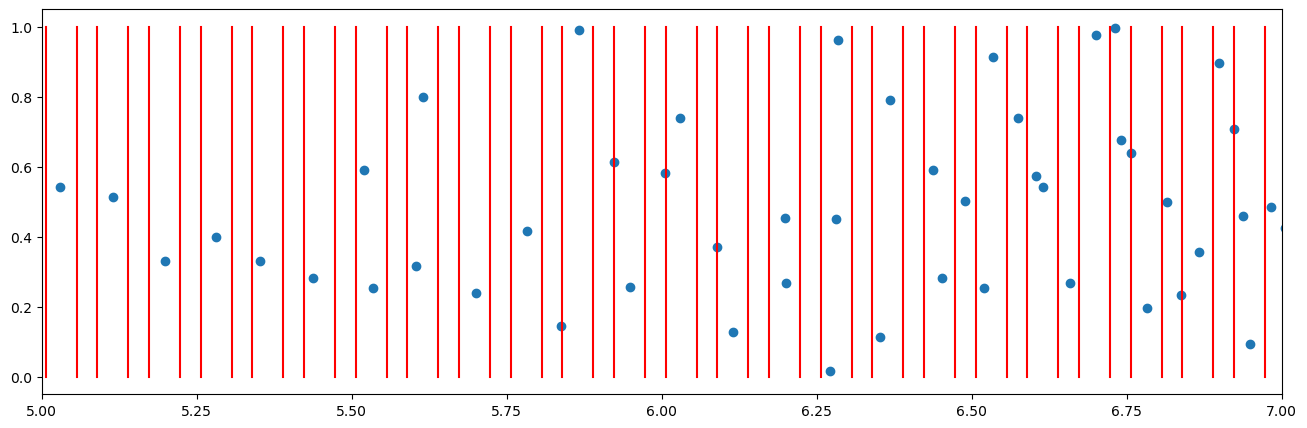

In [69]:
# This Library takes wave file and serializes it recognition formatsit as an array. 
from scipy.io import wavfile # get the api
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import ShortTimeFFT
from scipy.signal.windows import gaussian
from scipy.signal.windows import tukey
import os
import scipy.signal as signal
from math import log2
from math import pow
import re
import guessnote as guessnote
from importlib import reload 
import random
reload(guessnote)

import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square, ShortTimeFFT

plt.rcParams['figure.figsize'] = [16, 5]

fs,y = wavfile.read("content/norvegian.wav") # load the data
y=y.T[0]
y=y/np.max(y)*2
# how many seconds of audio make up an FFT window
[8.662,8.1658,9.177,9.723,15.4439]
win = np.ones(int(fs/8.662))  # symmetric Gaussian window
SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')
a=SFT.f
win = np.ones(int(fs/8.1658))  # symmetric Gaussian window
SFT = ShortTimeFFT(win, hop=int(fs//10), fs=fs,  scale_to='psd')
b=SFT.f
win = np.ones(int(fs/9.177))  # symmetric Gaussian window
SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')
c=SFT.f
win = np.ones(int(fs/9.723))  # symmetric Gaussian window
SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')
d=SFT.f
win = np.ones(int(fs/15.4439))  # symmetric Gaussian window
SFT = ShortTimeFFT(win, hop=fs//10, fs=fs,  scale_to='psd')
e=SFT.f

c=np.concatenate([a,b,c,d,e])
scale=guessnote.buildScale(tolerance=1/40)
c=np.log2(c)
plt.scatter(c,np.random.random((len(c))))
for i in scale:
    #print(i)
    plt.plot([np.log2(i),np.log2(i)],[0,1],c='r')

plt.xlim(5,7)
len(c)

# 

In [1]:
import guessnote as guessnote
from importlib import reload 
reload(guessnote)
#SFFT,Sx_dB=guessnote.getSFFT("content/killme.wav",-5,FFT_WINDOW_SECONDS = 1)
#bornes=guessnote.buildScale(tolerance=1/40)
#guessnote.mapFreq2Note(SFFT, Sx_dB,bornes)

guessnote.serialize("content/hey-jude.wav",tolerance=1/40,attenuationfloordb=-5)

 


    

/home/jovyan/FFT/guessnote.py:64: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs,y = wavfile.read(filename) # load the data


Spectro 0.7770564556121826
Spectro 0.7432873249053955
Spectro 0.6863059997558594
Spectro 0.6286754608154297
Spectro 0.2795994281768799
Fin danalyse SFFTT 3.739448070526123
Map2note
Serializing file content/hey-jude.npy
End of serialization content/hey-jude.npy
Fichier de Wav content/hey-jude.wav convertit en représentation npy content/hey-jude.npy


In [12]:
inv_map = guessnote.getMapFreq2Note(SFFT,bornes)
#print(inv_map)

notetable=np.full((len(bornes)+1,Sx_dB.shape[1]),-50.)
# On parcours tous les instants du spectrogramme.
for i in range(Sx_dB.shape[1]):
    #Pour chaque bin de fréquence (note ou intervalle entre note) nous aggrégeons sur la puissance maximale de de fréquence
    for k,v in inv_map.items():
#        print(k)
#        print(Sx_dB[v,i])
        notetable[k,i]=np.max(Sx_dB[v,i])   

array([0.0000e+00, 2.0000e+00, 4.0000e+00, ..., 2.3996e+04, 2.3998e+04,
       2.4000e+04])

In [65]:
import numpy as np


X=np.load("content/killme.npy")
X

array([[-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       ...,
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.],
       [-50., -50., -50., ..., -50., -50., -50.]])

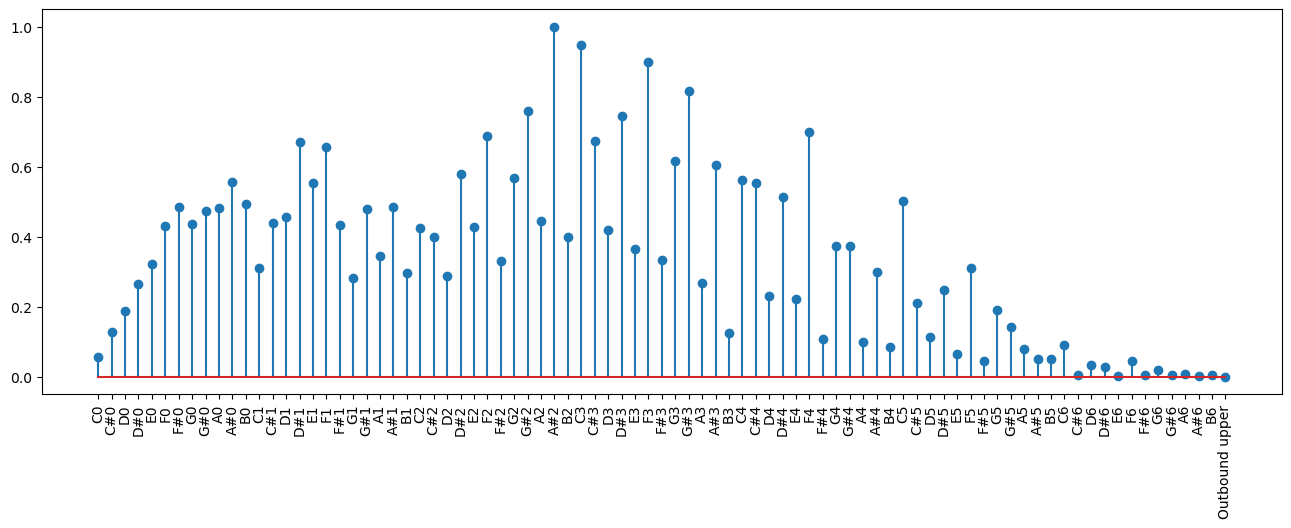

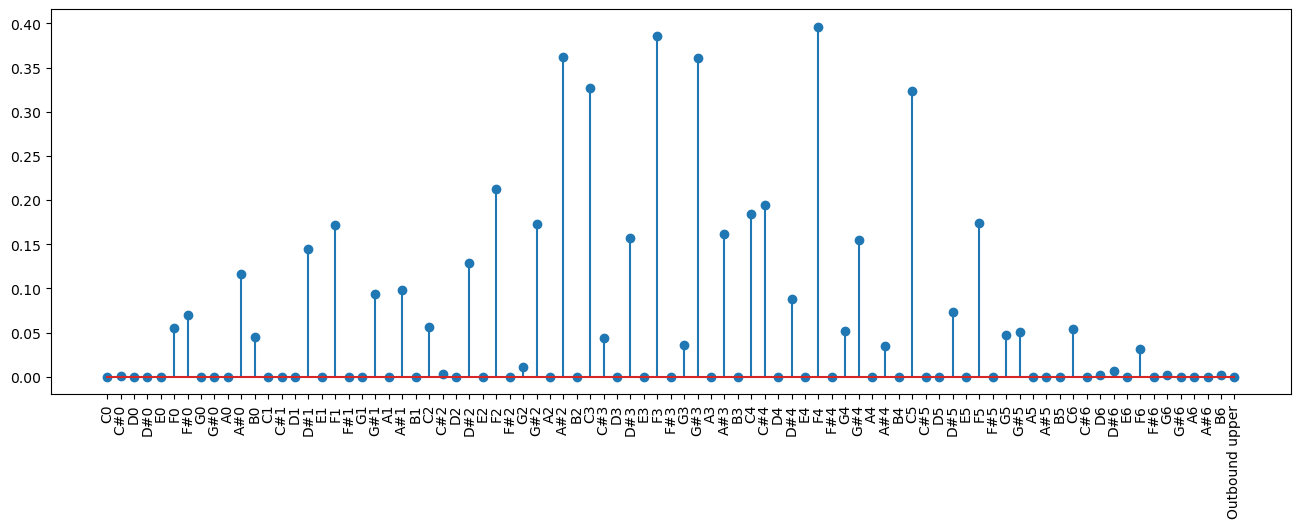

In [175]:
import re
import matplotlib.pyplot as plt

X=np.load("content/killme.npy")
plt.rcParams['figure.figsize'] = [16, 5]

tona=X.sum(axis=1)
tona=tona-np.min(tona)
tona=tona/np.max(tona)
tona=tona[range(1,len(tona),2)]

convolvevect=[-.25,-.25,1,-.25,-.25]
tonaconvolved=np.convolve(tona,convolvevect,mode='same')
tonaconvolved=tonaconvolved.clip(min=0)

binsids=np.where(tonaconvolved>.2)[0]+1
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]]) 


plt.stem(tona)
plt.xticks(range(0,len(tona)),keyboard[1:],rotation=90)
plt.show()



plt.stem(tonaconvolved)
plt.xticks(range(0,len(tona)),keyboard[1:],rotation=90)
plt.show()


In [23]:
import re
import matplotlib.pyplot as plt
import pandas as pd

X=np.load("content/billyjean.npy")
plt.rcParams['figure.figsize'] = [16, 5]

tona=X.sum(axis=1)
tona=tona-np.min(tona)
tona=tona/np.max(tona)
tona=tona[range(1,len(tona),2)]

convolvevect=[-.25,-.25,1,-.25,-.25]
tonaconvolved=np.convolve(tona,convolvevect,mode='same')
tonaconvolved=tonaconvolved.clip(min=0)


binsids=np.where(tonaconvolved>.2)[0]+1
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]]) 

note=[i%12 for i in range(len(tonaconvolved))]
#print(note)
dftona=pd.DataFrame(tonaconvolved,columns=["powerfreqnote"])
dftona["note"]=[i%12 for i in dftona.index]
signature=dftona.groupby("note").sum()
signature=signature/signature.max()

bestreso=0
bestresogamme=''
bestresopremierdegre=0
moderesodf=pd.DataFrame(columns=['mode','premierdegre','resonnance'])
for gamme in gammes.columns:
    #print(gamme)
    weight=gammes[gamme]
    for i in range(12):
        #print('premier degre',i)
        signature['weight']=np.roll(weight,i)
        resonnancedegamme=(signature['weight']*signature['powerfreqnote']).sum()
        moderesodf.loc[len(moderesodf)]=[gamme,i,resonnancedegamme]
        if resonnancedegamme>bestreso:
            bestreso=resonnancedegamme
            bestresogamme=gamme
            bestresopremierdegre=i
print("Gamme",bestresogamme,"Premier degre",bestresopremierdegre)
moderesodf.set_index(['mode','premierdegre'],inplace=True)
moderesodf.sort_values(by="resonnance",ascending=False,inplace=True)
moderesodf

Gamme Mineur Harmonique Premier degre 6


,,resonnance
mode,premierdegre,
Mineur Harmonique,6,1.511493
Melodique Descendant,6,1.495426
Mineur naturel,6,1.495426
Majeur,6,1.485409
Mixolydien,6,1.477963
...,...,...
Lydien,8,0.187415
Mineur Harmonique,0,0.166993
Mixolydien,0,0.150508


In [163]:
(signature['weight']*signature['powerfreqnote']).sum()

0.9707173734650161

In [86]:
binsids=np.where(tonaconvolved>.2)[0]+1
binsids
print(keyboard[binsids])
np.unique([re.sub("[0-9]$","",i) for i in keyboard[binsids]])

['F1' 'F2' 'G#2' 'A#2' 'C3' 'F3' 'G#3' 'C4' 'C#4' 'F4' 'G#4' 'C5']


array(['A#', 'C', 'C#', 'F', 'G#'], dtype='<U2')

In [109]:
import guessnote as guessnote
from importlib import reload 
reload(guessnote)
X=np.load("content/killme.npy")
guessnote.getMainNotes(X)


[ 1  2  6  9 11]
['A#' 'C' 'C#' 'F' 'G#']


array([ 0,  1,  5,  8, 10])

In [22]:
majeure=[0,2,4,5,7,9,11]
mineurharmonique=[0,2,3,5,7,8,11]

weightmajeure=[1,0,1/5,0,1/3,1/4,0,1/2,0,1/5,0,1/4]
weightmineurharmonique=[1,0,1/5,1/3,0,1/4,0,1/2,1/5,0,0,1/4]
weightmineurnaturel=[1,0,1/5,1/3,0,1/4,0,1/2,1/5,0,1/4,0]
weightmelodiqueasc=[1,0,1/5,1/3,0,1/4,0,1/2,0,1/5,0,1/4]
weightmelodiquedesc=[1,0,1/5,1/3,0,1/4,0,1/2,1/5,0,1/4,0]
weightmixolydien=[1,0,1/5,0,1/3,1/4,0,1/2,1/5,0,1/4,0]
weightlydien=[1,0,1/5,0,1/4,0,1/3,1/2,0,1/5,0,1/4]

mineurnaturel=[0,2,3,5,7,8,10]
mineurmelodiqueasc=[0,2,3,5,7,9,11]
mineurmelodiquedesc=[0,2,3,5,7,8,10]

gammes=pd.DataFrame({"Majeur":weightmajeure,"Mineur Harmonique":weightmineurharmonique,"Mineur naturel":weightmineurnaturel,"Melodique Descendant":weightmelodiquedesc,"Lydien":weightlydien,"Mixolydien":weightmixolydien})
gammes.sum()

Majeur                  2.733333
Mineur Harmonique       2.733333
Mineur naturel          2.733333
Melodique Descendant    2.733333
Lydien                  2.733333
Mixolydien              2.733333
dtype: float64

In [147]:
len(weight)

12

(0.0, 100.0)

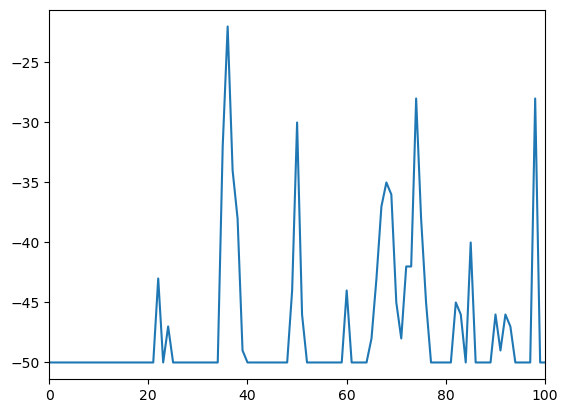

In [12]:
import matplotlib.pyplot as plt
#plt.imshow(X, origin='lower')
plt.plot(X[:,1500])
plt.xlim(0,100)

In [20]:
from math import log2
from math import pow

# Constants
# The scale of note
notescale=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
# The log2 increment of a semi-tone log2(2)/12= 1/12
increment=1/12
# The log2 representation of the A440 that is used as reference for our scale.
alog=log2(440)
#The bin boundary in frequency for each tone
bornes=[]

# Construction de la table mappant table vers index de note.
mapftonote={}
# This create some bins for a scale with for each note a lower bound and an upper bound. 
from math import log2
from math import pow

notescale=["C","C#","D","D#","E","F","F#","G","G#","A","A#","B"]
increment=1/12
tolerance=1/30
alog=log2(440)
bornes=[]
notes=[]

# construction all notes fundamental frequency interval above A3
# you can compupte the span above A in octave with the formula
# (range - distance to above C) /2   ==> 39-3 / 12 = 3
for i in range(39):
    lowerbound=pow(2,alog+increment*i-tolerance)
    upperbound=pow(2,alog+increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])
bornes.extend([upperbound])
# construction all notes fundamental frequency interval below A3
# you can compupte the span below A in octave with the formula
# (range - distance to below C) /2   ==> 46 - 10 / 2

for i in range(1,46):
    lowerbound=pow(2,alog-increment*i-tolerance)
    upperbound=pow(2,alog-increment*i+tolerance)
    bornes.extend([lowerbound,upperbound])

bornes.extend([-1])
bornes.sort()
keyboard=["OutBoundLower"]
for i in range (0,7):
    for j in notescale:
        notename=j+str(i)
        keyboard.append(notename)
keyboard.append("Outbound upper")

keyboard=np.array(keyboard)
len(bornes)//2
#len(keyboard)
len(keyboard)


86